<h4 style="color:purple">Nasir Hussain 04072013040</h4>

<center>
<h3 style="color:purple">Introduction to Data Mining</h3>
<h4 style="color:purple">Assignment : 01 Part [II] </h4>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h3 style="color:purple">Task 1:Load the dataset</h3>

In [2]:
dataset=np.genfromtxt("Bank Marketing Dataset.csv",delimiter=",",dtype=str)
dataset = dataset[:1001]
dataset

array([['age', 'job', 'marital', ..., 'previous', 'poutcome',
        'subscribed'],
       ['30', 'unemployed', 'married', ..., '0', 'unknown', 'no'],
       ['33', 'services', 'married', ..., '4', 'failure', 'no'],
       ...,
       ['34', 'management', 'single', ..., '1', 'failure', 'no'],
       ['40', 'services', 'married', ..., '0', 'unknown', 'no'],
       ['20', 'student', 'single', ..., '5', 'failure', 'no']],
      dtype='<U13')

In [3]:
data=pd.read_csv("Bank Marketing Dataset.csv")
data=data.iloc[:1000]
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
len(data)

1000

<h3 style="color:purple">Task 2:Normalize one numeric attribute using all three normalization formula we studied</h3>

In [5]:
Duration = dataset[1:, 11].astype(int)

<h3 style="color:orange">Formula 1 : min-max normalization</h3>

<h4 style="color:purple">By Coding</h4>

In [6]:
Norm_Duration_1a = np.zeros(1000)
max_duration = np.max(Duration)
min_duration = np.min(Duration)
new_max=5
new_min=1

for i in range(1000):
    val=(Duration[i]-min_duration)/(max_duration-min_duration)
    Norm_Duration_1a[i]=val*(new_max-new_min)+new_min

<h4 style="color:purple">By Build-in interp()</h4>

In [7]:
Norm_Duration_1b=np.interp(Duration, (min_duration, max_duration), (1, 5))

In [8]:
Norm_Duration_1a[9]

1.4079470198675497

In [9]:
Norm_Duration_1b[9]

1.4079470198675497

<h3 style="color:orange">Formula 2 : z-score normalization</h3>

<h4 style="color:purple">By Coding</h4>

In [10]:
Norm_Duration_2a = np.zeros(1000)
mean_duration=np.mean(Duration)
std_duration=np.std(Duration)
for i in range(1000):
    Norm_Duration_2a[i]=(Duration[i]-mean_duration)/std_duration

<h4 style="color:purple">By built-in zscore()</h4>

In [11]:
from scipy.stats import zscore
Norm_Duration_2b=zscore(Duration)

In [12]:
Norm_Duration_2a[9]

0.17987066961398407

In [13]:
Norm_Duration_2b[9]

0.17987066961398407

<h3 style="color:orange">Formula 3 : decimal scaling normalization</h3>

In [39]:
max_duration

3025

In [15]:
a=str(max_duration)
j=len(a)
max_duration/(10**j)

0.3025

In [16]:
Norm_Duration_3 = np.zeros(1000)
for i in range(1000):
    Norm_Duration_3[i]=Duration[i]/(10**j)

In [17]:
Norm_Duration_3[9]

0.0313

<h3 style="color:purple">Task 3:Find the correlation between two numeric attributes</h3>

In [18]:
Customer_Ages = dataset[1:, 0].astype(int)
Campaign = dataset[1:, 12].astype(int)

<h3 style="color:orange">Using : Pearson's product moment coefficient</h3>

<h4 style="color:purple">By Coding</h4>

In [40]:
sumA=0
sumB=0
summation=0
meanA=np.mean(Customer_Ages)
meanB=np.mean(Campaign)
stdA=np.std(Customer_Ages)
stdB=np.std(Campaign)
n=1000
for i in range(1000):
    sumA=Customer_Ages[i]-meanA
    sumB=Campaign[i]-meanB
    summation+=sumA*sumB
rAB=summation/(n*stdA*stdB)

In [41]:
rAB

0.019467925067052028

<h4 style="color:purple">By Built-in corrcoef()</h4>

In [42]:
rAB1=np.corrcoef(Customer_Ages,Campaign)
rAB1

array([[1.        , 0.01946793],
       [0.01946793, 1.        ]])

In [43]:
rAB1[0][1]

0.019467925067052003

<h6 style="color:blue">In diagonal there is correlation between x and x, and y and y</h6>

<h4 style="color:green"><b>INDEPENDENT AS rAB=rAB1=0</b> <i>where A=Customer_Age and B=Campaign</i></h4>

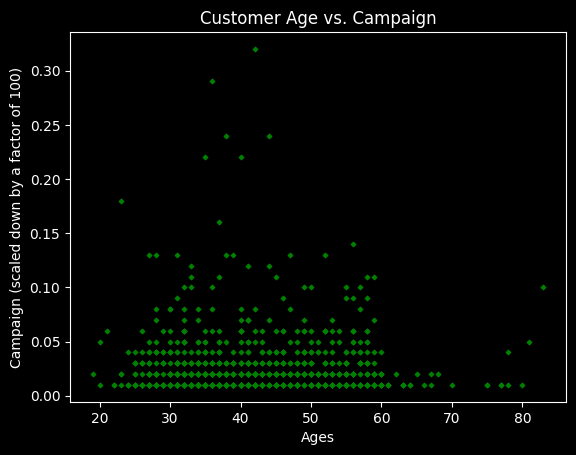

In [44]:
plt.style.use('dark_background')
with plt.style.context('dark_background'):
    plt.scatter(Customer_Ages,(Campaign/100),marker="D",s=5,color="green")
    plt.xlabel("Ages")
    plt.ylabel("Campaign (scaled down by a factor of 100)")
    plt.title("Customer Age vs. Campaign")
    plt.show()

#plt.grid(color="red", linestyle=":", alpha=0.5)

<h3 style="color:purple">Task 4:Form a random sample of a given size with replacement</h3>

<h4 style="color:orange">Stratified Sampling (ACCORDING TO AGE)</h4>

In [45]:
Customer_Ages.min()

19

In [46]:
Customer_Ages.max()

83

In [47]:
age_class = [18, 30, 50, 65, 84] 
age_groups = np.digitize(Customer_Ages, age_class)
TeenagersYoungAdults = Customer_Ages[np.where(age_groups == 1)]
Adults = Customer_Ages[np.where(age_groups == 2)]
MiddleAgedAdults = Customer_Ages[np.where(age_groups == 3)]
SeniorCitizens = Customer_Ages[np.where(age_groups == 4)]

In [48]:
TYA=np.size(TeenagersYoungAdults)
A=np.size(Adults)
MAA=np.size(MiddleAgedAdults)
SC=np.size(SeniorCitizens)
print("TeenagerYoungAdults : ",TYA)
print("Adults : ",A)
print("MiddleAgedAdults : ",MAA)
print("SeniorCitizens : ",SC)

TeenagerYoungAdults :  109
Adults :  658
MiddleAgedAdults :  218
SeniorCitizens :  15


In [49]:
xdataset = dataset[1:].copy()

def select_sample_group(sampleSize, ageArray):
    ageArray = ageArray.astype(str)
    groupAgeIndices = np.where(np.isin(xdataset[:, 0], ageArray))[0]
    random_selection_indices = np.random.choice(groupAgeIndices, size=sampleSize, replace=True)
    return random_selection_indices


In [50]:
import math
x1=select_sample_group(math.ceil(TYA/2),TeenagersYoungAdults)
x2=select_sample_group(math.ceil(A/2),Adults)
x3=select_sample_group(math.ceil(MAA/2),MiddleAgedAdults)
x4=select_sample_group(math.ceil(SC/2),SeniorCitizens)

In [51]:
x5=np.concatenate((x1,x2,x3,x4))

In [52]:
sampleDataSet=xdataset[x5]
len(sampleDataSet)

501

In [53]:
sampleDataSet

array([['22', 'student', 'single', ..., '0', 'unknown', 'no'],
       ['26', 'unemployed', 'single', ..., '0', 'unknown', 'no'],
       ['27', 'self-employed', 'married', ..., '0', 'unknown', 'no'],
       ...,
       ['77', 'retired', 'divorced', ..., '0', 'unknown', 'yes'],
       ['81', 'retired', 'married', ..., '0', 'unknown', 'no'],
       ['81', 'retired', 'married', ..., '0', 'unknown', 'no']],
      dtype='<U13')

In [54]:
print("1-TeenagersYoungAdults")
print("\tPopulation Size = ",TYA)
print("\tSample Size = ",np.size(x1))
print("2-Adults")
print("\tPopulation Size = ",A)
print("\tSample Size = ",np.size(x2))
print("3-MiddleAgedAdults")
print("\tPopulation Size = ",MAA)
print("\tSample Size = ",np.size(x3))
print("4-SeniorCitizens")
print("\tPopulation Size = ",SC)
print("\tSample Size = ",np.size(x4))
print("5-DATASETS")
print("\tPopulation Size = ",len(xdataset))
print("\tSample Size = ",len(sampleDataSet))

1-TeenagersYoungAdults
	Population Size =  109
	Sample Size =  55
2-Adults
	Population Size =  658
	Sample Size =  329
3-MiddleAgedAdults
	Population Size =  218
	Sample Size =  109
4-SeniorCitizens
	Population Size =  15
	Sample Size =  8
5-DATASETS
	Population Size =  1000
	Sample Size =  501


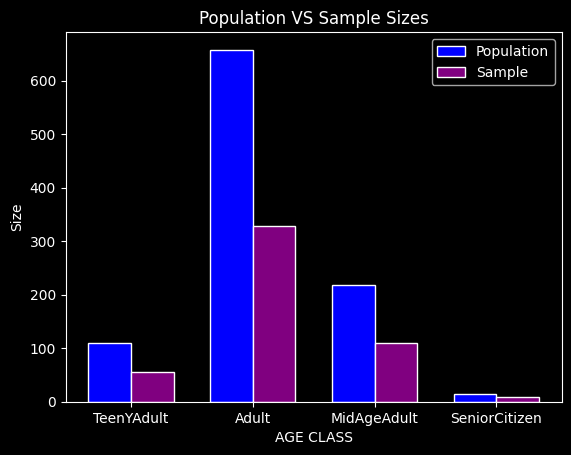

In [55]:
xTYA=np.size(x1)
xA=np.size(x2)
xMAA=np.size(x3)
xSC=np.size(x4)

populations = np.array([TYA, A, MAA, SC])
samples = np.array([xTYA, xA, xMAA, xSC])

bwidth=0.35
s = np.arange(len(populations))
p = [x + bwidth for x in s]
plt.style.use('dark_background')
with plt.style.context('dark_background'):
    plt.bar(s, populations, color='blue',edgecolor='white', width=bwidth, label='Population')
    plt.bar(p, samples, color='purple',edgecolor='white', width=bwidth, label='Sample')

    plt.xlabel('AGE CLASS')
    plt.xticks([r + bwidth/2 for r in range(len(populations))], ['TeenYAdult', 'Adult', 'MidAgeAdult', 'SeniorCitizen'])
    plt.ylabel('Size')
    plt.title('Population VS Sample Sizes')

    plt.legend()
    plt.show()

<h4 style="color:red">-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<center><h2 style="color:purple">END OF ASSIGNMENT</h2></center>

<h4 style="color:red">-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>